In [1]:
import os 
 
# Set the CUDA_VISIBLE_DEVICES environment variable to the desired GPU ID 
os.environ["CUDA_VISIBLE_DEVICES"] = "1"  # Replace 1 with the GPU ID you want to use 
 
# Now, your Python code will run on the specified GPU 
# For example: 
import torch 
 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
print(f"Running on device: {device}") 
 

Running on device: cuda


## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

 ### Protected attributes

These are extracted from the images using the deepface api

In [3]:
annotations = pd.read_csv('protected_attributes.csv')    # reading the csv file
annotations.head() 

,image_id,race,gender,emotion
0,009680.jpg,latino hispanic,Woman,happy
1,009028.jpg,white,Woman,happy
2,007702.jpg,white,Woman,sad
3,009681.jpg,white,Man,happy
4,010355.jpg,white,Woman,sad


In [4]:
annotations.columns = ["image_id", "race", "gender", "emotion"]

In [5]:
annotations

,image_id,race,gender,emotion
0,009680.jpg,latino hispanic,Woman,happy
1,009028.jpg,white,Woman,happy
2,007702.jpg,white,Woman,sad
3,009681.jpg,white,Man,happy
4,010355.jpg,white,Woman,sad
...,...,...,...,...
10405,000102.jpg,white,Man,fear
10406,000103.jpg,white,Woman,neutral
10407,000104.jpg,white,Man,happy
10408,000105.jpg,white,Man,neutral


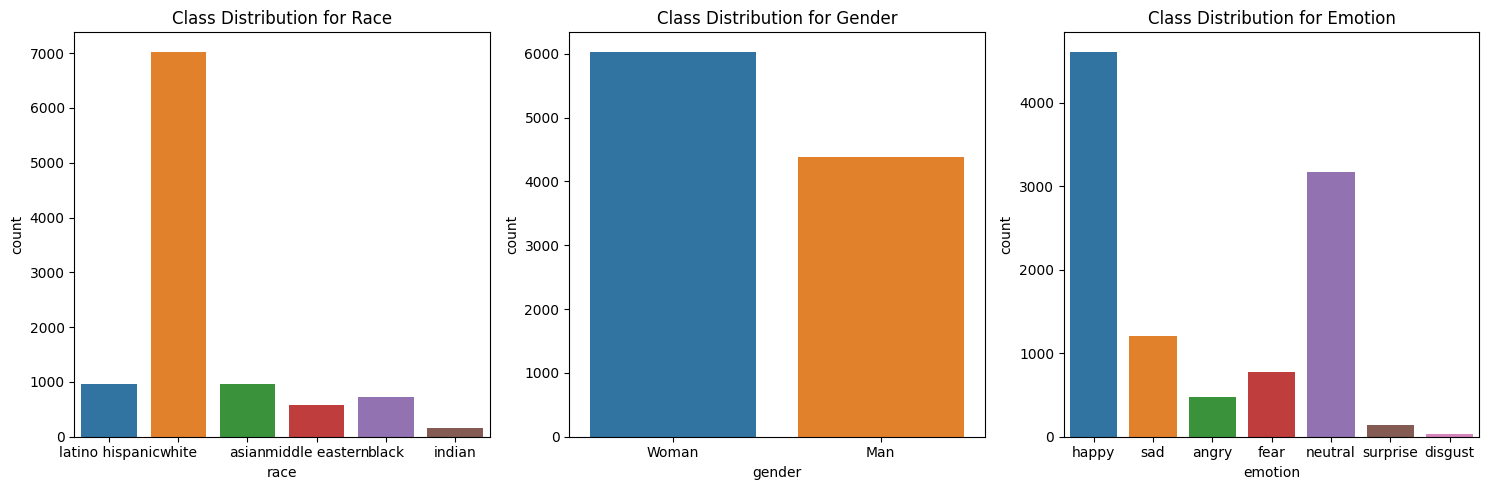

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = annotations

# Plot class distribution for each attribute
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(data=df, x='race', ax=axes[0])
sns.countplot(data=df, x='gender', ax=axes[1])
sns.countplot(data=df, x='emotion', ax=axes[2])

axes[0].set_title('Class Distribution for Race')
axes[1].set_title('Class Distribution for Gender')
axes[2].set_title('Class Distribution for Emotion')


plt.tight_layout()
plt.show()

- Higher distribution of white race and lowest of indian race
- The woman gender is more than man
- The happy emotions are highest and the disgust is the lowest

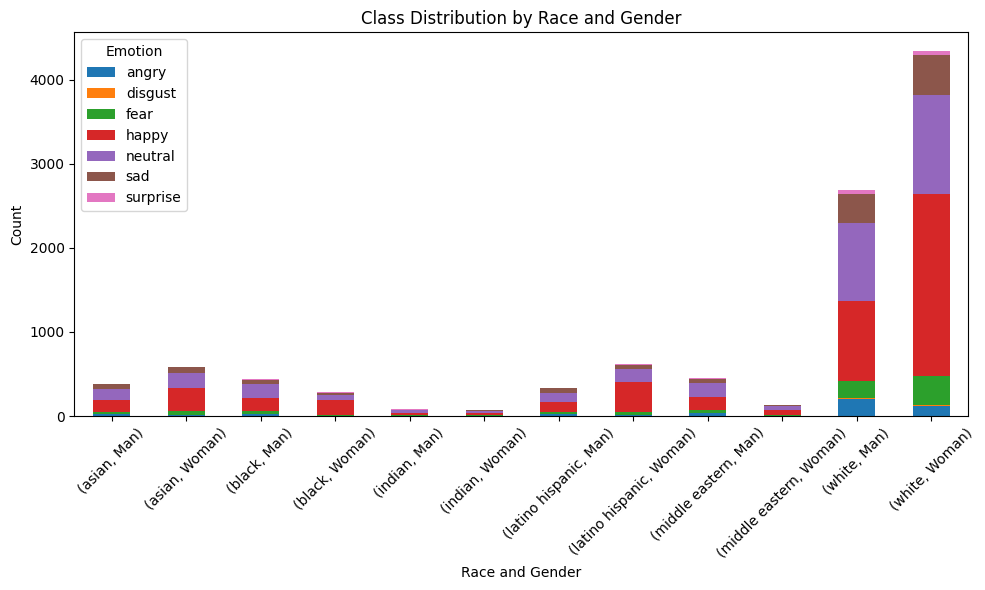

In [7]:
# Group by 'race' and 'gender', and plot class distribution for 'emotion'
grouped = df.groupby(['race', 'gender'])['emotion'].value_counts().unstack().fillna(0)

# Plot grouped data
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Class Distribution by Race and Gender')
plt.xlabel('Race and Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Emotion')
plt.tight_layout()
plt.show()

- White woman have more samples of happy emotion
- Asian man samples are least

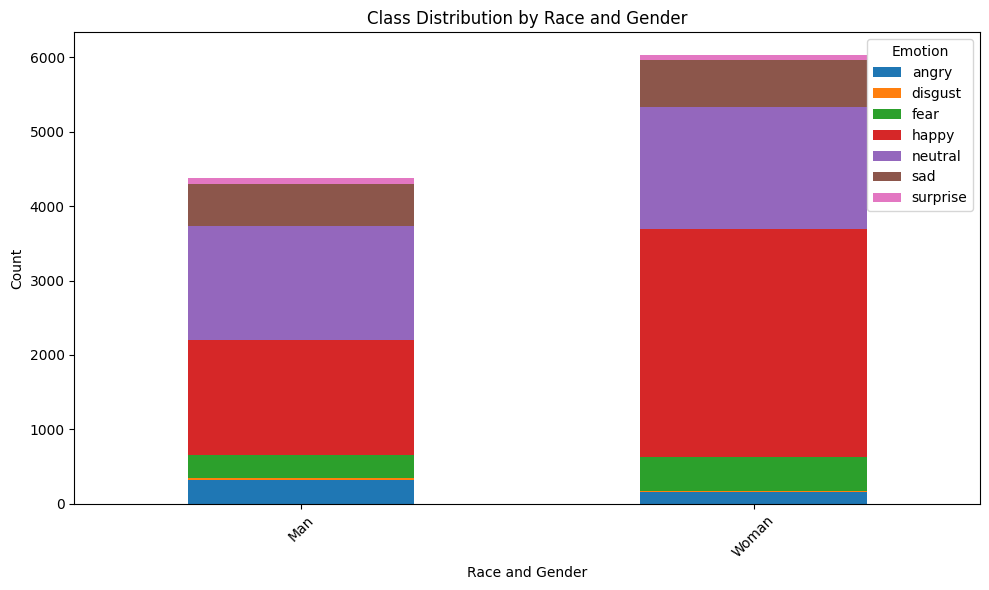

In [8]:
# Group by 'race' and 'gender', and plot class distribution for 'emotion'
grouped = df.groupby(['gender', 'emotion'])['emotion'].value_counts().unstack().fillna(0)

# Plot grouped data
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Class Distribution by Race and Gender')
plt.xlabel('Race and Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Emotion')
plt.tight_layout()
plt.show()

 ### Non-protected attributes

These are other attributes of the image dataset that describes the image

In [10]:
other_attributes = pd.read_csv('non-protected_attributes.csv')    # reading the csv file
other_attributes.head() 

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie
0,009680.jpg,-1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,1,-1,1,1,-1,1,-1,-1
1,009028.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,1,-1,1,1,-1,1,-1,-1
2,007702.jpg,-1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,1,-1,-1
3,009681.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,-1,-1,-1,1
4,010355.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,-1


## Combining protected and other attributes

In [11]:


# Assuming you have two DataFrames: 'df1' and 'df2' with a column named 'image_id' that you want to use for merging.

# Perform an inner join based on the 'image_id' column
merged_df = pd.merge(annotations, other_attributes, on='image_id')

# Print the merged DataFrame
print(merged_df)


         image_id             race gender  emotion  5_o_Clock_Shadow  \
0      009680.jpg  latino hispanic  Woman    happy                -1   
1      009028.jpg            white  Woman    happy                -1   
2      007702.jpg            white  Woman      sad                -1   
3      009681.jpg            white    Man    happy                -1   
4      010355.jpg            white  Woman      sad                -1   
...           ...              ...    ...      ...               ...   
10405  000102.jpg            white    Man     fear                -1   
10406  000103.jpg            white  Woman  neutral                -1   
10407  000104.jpg            white    Man    happy                -1   
10408  000105.jpg            white    Man  neutral                -1   
10409  000106.jpg            white  Woman    happy                -1   

       Arched_Eyebrows  Attractive  Bags_Under_Eyes  Bald  Bangs  ...  \
0                    1          -1               -1    -1     

In [12]:
# List of all attribute column names (replace with actual column names)
attribute_columns = other_attributes.columns.difference(['image_id'])

In [13]:
attribute_columns

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie'],
      dtype='object')

In [14]:
# Initialize an empty dictionary to store the results
results = {}

for attribute in attribute_columns:
    grouped = merged_df.groupby(['race', 'gender', attribute])[attribute].count().unstack(fill_value=0)
    results[attribute] = grouped.reset_index()

In [15]:
# Convert the dictionary of DataFrames into a single DataFrame
result_df = pd.concat(results.values(), keys=results.keys())

# Reset the index
result_df.reset_index(level=0, inplace=True)
result_df.index.name = 'Index'

# Display the resulting DataFrame
print(result_df)

                level_0             race gender    -1    1
Index                                                     
0      5_o_Clock_Shadow            asian    Man   359   27
1      5_o_Clock_Shadow            asian  Woman   582    0
2      5_o_Clock_Shadow            black    Man   372   71
3      5_o_Clock_Shadow            black  Woman   281    0
4      5_o_Clock_Shadow           indian    Man    66   14
...                 ...              ...    ...   ...  ...
7       Wearing_Necktie  latino hispanic  Woman   619    0
8       Wearing_Necktie   middle eastern    Man   366   85
9       Wearing_Necktie   middle eastern  Woman   133    0
10      Wearing_Necktie            white    Man  2242  441
11      Wearing_Necktie            white  Woman  4343    2

[456 rows x 5 columns]


In [16]:
result_df.rename(columns={'level_0': 'attribute', -1: 'absence', 1: 'presence'}, inplace=True)
result_df.reset_index(inplace=True)

# Display the resulting DataFrame
print(result_df)

     Index         attribute             race gender  absence  presence
0        0  5_o_Clock_Shadow            asian    Man      359        27
1        1  5_o_Clock_Shadow            asian  Woman      582         0
2        2  5_o_Clock_Shadow            black    Man      372        71
3        3  5_o_Clock_Shadow            black  Woman      281         0
4        4  5_o_Clock_Shadow           indian    Man       66        14
..     ...               ...              ...    ...      ...       ...
451      7   Wearing_Necktie  latino hispanic  Woman      619         0
452      8   Wearing_Necktie   middle eastern    Man      366        85
453      9   Wearing_Necktie   middle eastern  Woman      133         0
454     10   Wearing_Necktie            white    Man     2242       441
455     11   Wearing_Necktie            white  Woman     4343         2

[456 rows x 6 columns]


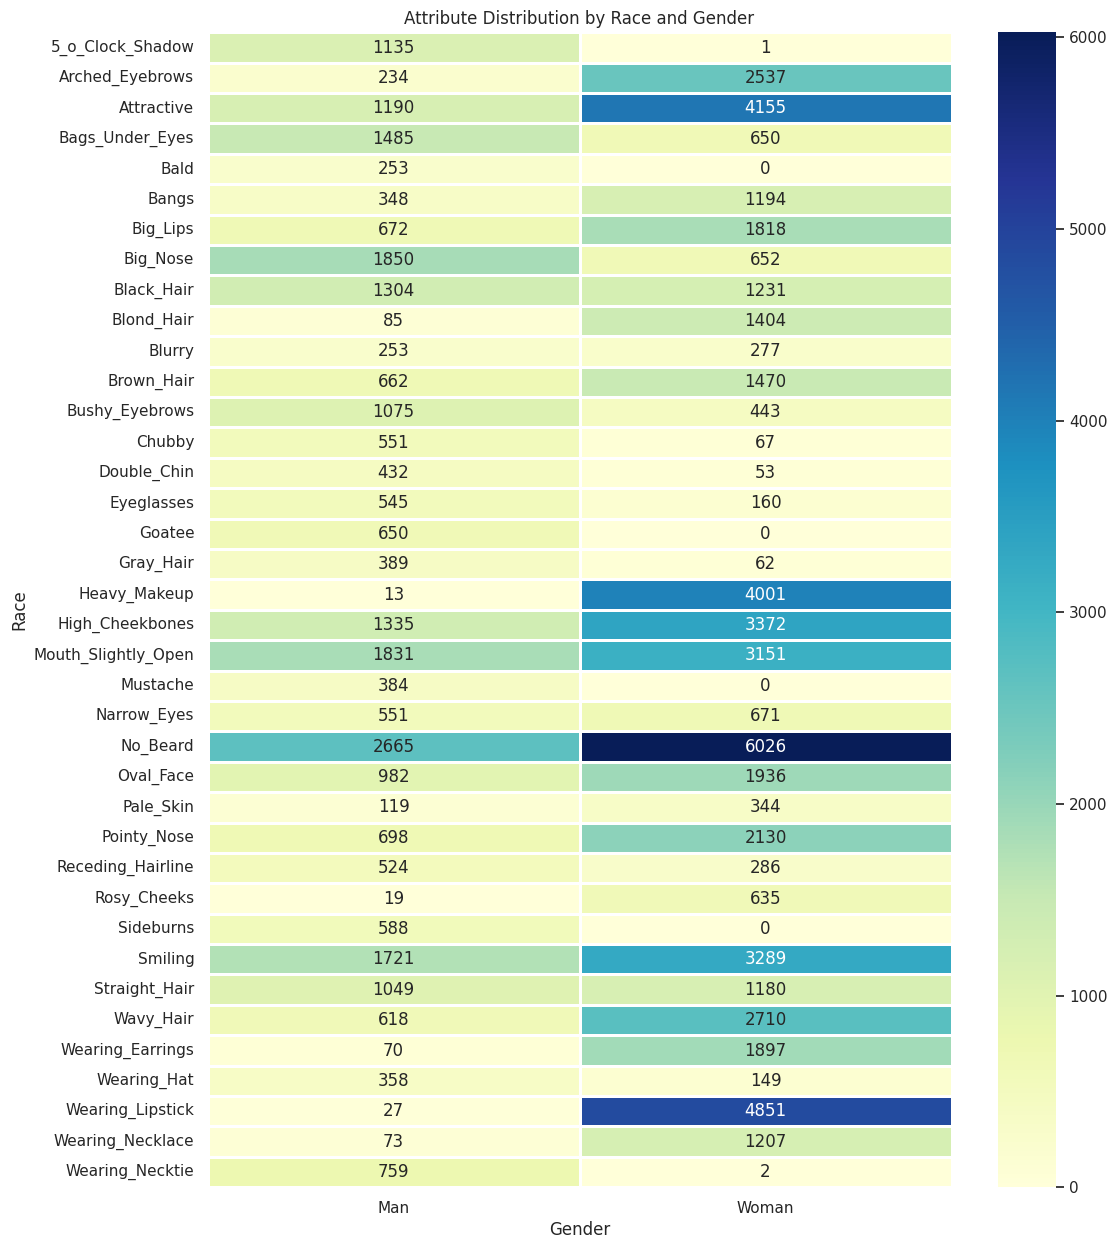

In [17]:
# Set the style
sns.set(style="whitegrid")

# Pivot the DataFrame for heatmap visualization
pivot_df = result_df.pivot_table(index='attribute', columns='gender', values='presence', aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(12, 15))
sns.heatmap(pivot_df, annot=True, fmt='d', cmap='YlGnBu', linewidths=1)
plt.title("Attribute Distribution by Race and Gender")
plt.xlabel("Gender")
plt.ylabel("Race")
plt.show()

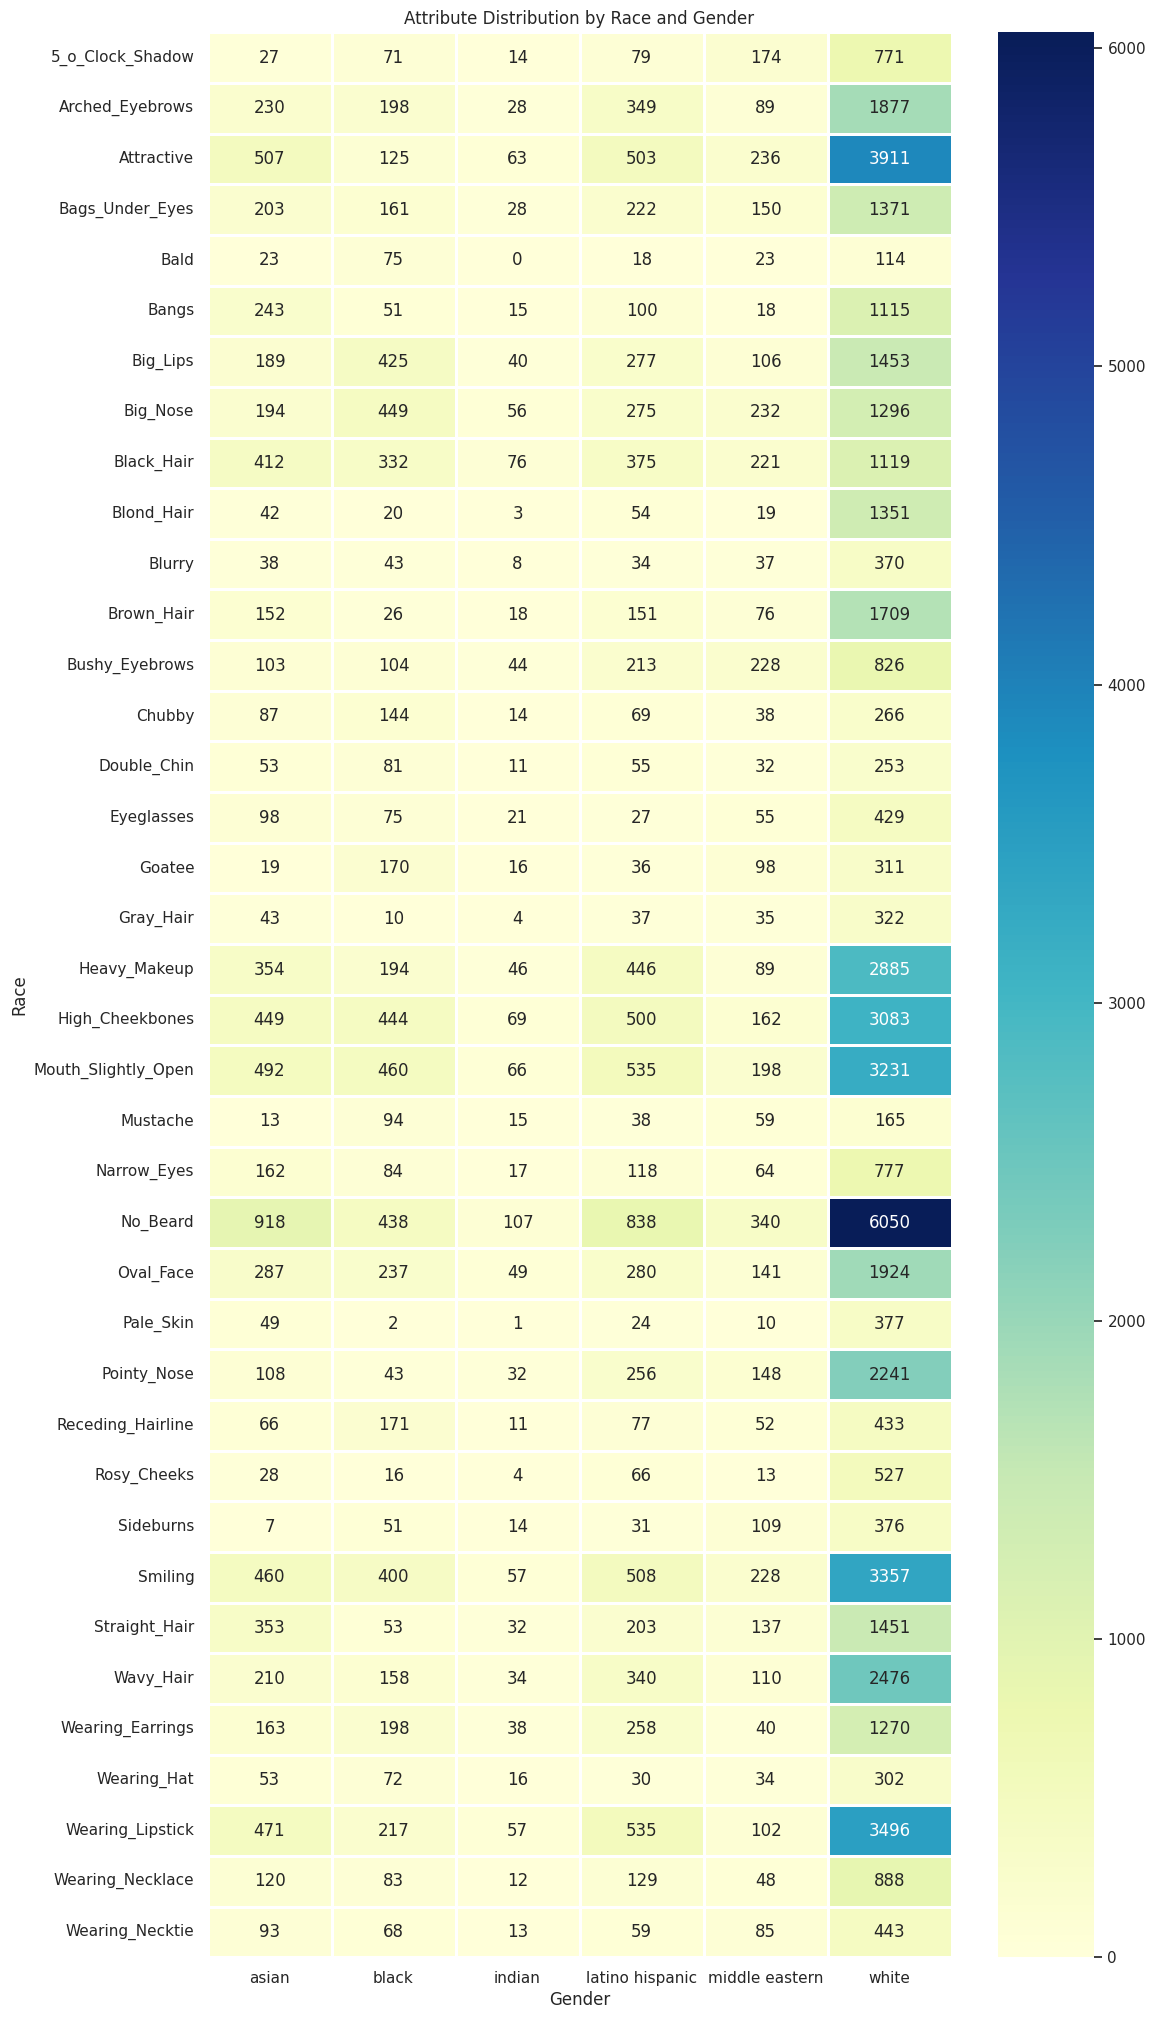

In [18]:
# Set the style
sns.set(style="whitegrid")

# Pivot the DataFrame for heatmap visualization
pivot_df = result_df.pivot_table(index='attribute', columns='race', values='presence', aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(12, 25))
sns.heatmap(pivot_df, annot=True, fmt='d', cmap='YlGnBu', linewidths=1)
plt.title("Attribute Distribution by Race and Gender")
plt.xlabel("Gender")
plt.ylabel("Race")
plt.show()

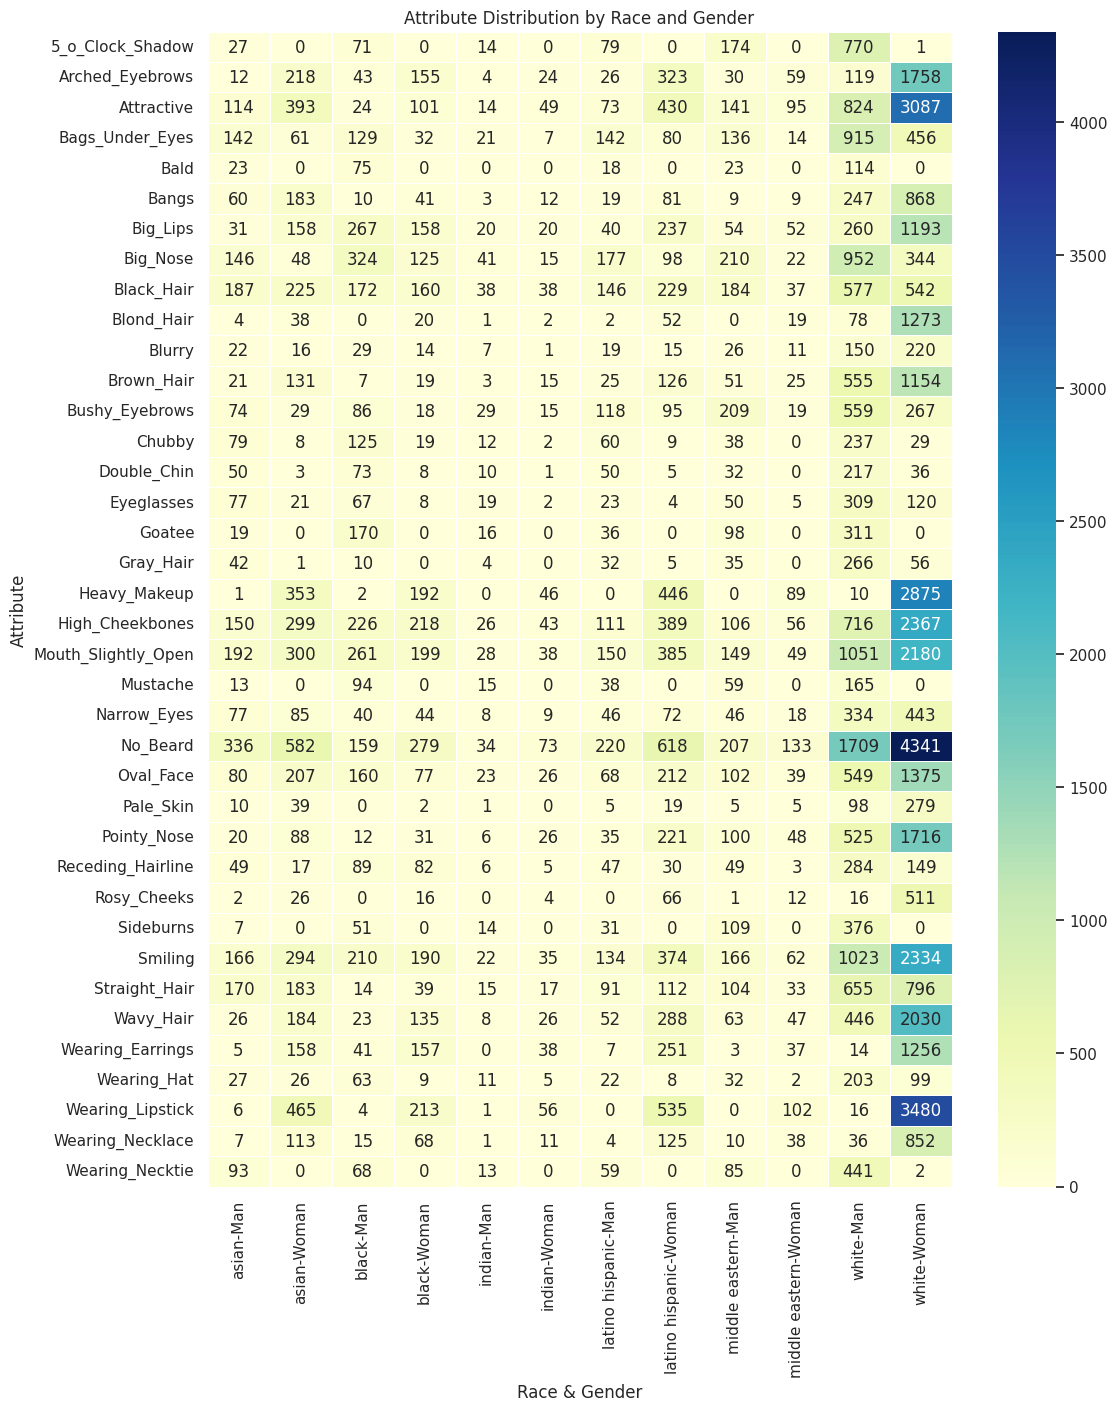

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot the DataFrame for heatmap visualization
pivot_df = result_df.pivot_table(index='attribute', columns=['race', 'gender'], values='presence', aggfunc='sum')

# Set up the heatmap
plt.figure(figsize=(12, 15))
sns.heatmap(pivot_df, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title("Attribute Distribution by Race and Gender")
plt.xlabel("Race & Gender")
plt.ylabel("Attribute")
plt.show()


- Remove one instance where white woman has a 5oclock shadow
- Remove the instance where indian man has a blond hair
- Remove with indian man has a pale skin

In [20]:
merged_df[(merged_df['race'] == 'white') & (merged_df['gender'] == 'Woman') & (merged_df['5_o_Clock_Shadow'] == 1)]['image_id']


7261    004214.jpg
Name: image_id, dtype: object

In [21]:
filtered_df = merged_df[merged_df['race'] != 'indian'] 

In [22]:
filtered_df = filtered_df[filtered_df['image_id'] != '004214.jpg']

In [23]:
filtered_df

,image_id,race,gender,emotion,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,...,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie
0,009680.jpg,latino hispanic,Woman,happy,-1,1,-1,-1,-1,1,...,-1,-1,1,-1,1,1,-1,1,-1,-1
1,009028.jpg,white,Woman,happy,-1,-1,-1,-1,-1,-1,...,1,-1,1,-1,1,1,-1,1,-1,-1
2,007702.jpg,white,Woman,sad,-1,1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,1,-1,1,-1,-1
3,009681.jpg,white,Man,happy,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,-1,-1,-1,1
4,010355.jpg,white,Woman,sad,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10405,000102.jpg,white,Man,fear,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
10406,000103.jpg,white,Woman,neutral,-1,1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,1,1,-1
10407,000104.jpg,white,Man,happy,-1,-1,1,1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,1
10408,000105.jpg,white,Man,neutral,-1,-1,-1,-1,-1,1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,-1


In [24]:
merged_df.shape

(10410, 42)

In [25]:
protected_attributes = filtered_df[["image_id", "race", "gender", "emotion"]]

In [26]:
other_attributes = filtered_df.drop(["race", "gender", "emotion"], axis = 1)

In [27]:
other_attributes

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie
0,009680.jpg,-1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,1,-1,1,1,-1,1,-1,-1
1,009028.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,1,-1,1,1,-1,1,-1,-1
2,007702.jpg,-1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,1,-1,-1
3,009681.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,-1,-1,-1,1
4,010355.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10405,000102.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
10406,000103.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,1,1,-1
10407,000104.jpg,-1,-1,1,1,-1,-1,-1,1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,1
10408,000105.jpg,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,-1


In [28]:
protected_attributes[protected_attributes['race'] == 'indian'] 

,image_id,race,gender,emotion


In [31]:
other_attributes.to_csv('non-protected_attributes_post_eda.csv', index=False)
protected_attributes.to_csv('protected_attributes_post_eda.csv', index=False)